In [148]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

In [149]:
df = pd.read_csv('asd_Child.csv',na_values='?')

In [150]:
df.columns

Index(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               292 non-null    int64  
 1   A1_Score         292 non-null    int64  
 2   A2_Score         292 non-null    int64  
 3   A3_Score         292 non-null    int64  
 4   A4_Score         292 non-null    int64  
 5   A5_Score         292 non-null    int64  
 6   A6_Score         292 non-null    int64  
 7   A7_Score         292 non-null    int64  
 8   A8_Score         292 non-null    int64  
 9   A9_Score         292 non-null    int64  
 10  A10_Score        292 non-null    int64  
 11  age              288 non-null    float64
 12  gender           292 non-null    object 
 13  ethnicity        249 non-null    object 
 14  jundice          292 non-null    object 
 15  austim           292 non-null    object 
 16  contry_of_res    292 non-null    object 
 17  used_app_before 

In [152]:
df.head(5)

,id,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,1,0,0,1,1,0,1,0,...,m,Others,no,no,Jordan,no,5,4-11 years,Parent,NO
1,2,1,1,0,0,1,1,0,1,0,...,m,Middle Eastern,no,no,Jordan,no,5,4-11 years,Parent,NO
2,3,1,1,0,0,0,1,1,1,0,...,m,NaN,no,no,Jordan,yes,5,4-11 years,NaN,NO
3,4,0,1,0,0,1,1,0,0,0,...,f,NaN,yes,no,Jordan,no,4,4-11 years,NaN,NO
4,5,1,1,1,1,1,1,1,1,1,...,m,Others,yes,no,United States,no,10,4-11 years,Parent,YES


In [153]:
data = df.drop(['id', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'ethnicity',  'contry_of_res',
       'used_app_before', 'age_desc', 'relation'],axis = 1)
#'jundice', 'austim',, 'Class/ASD', 'result', 'age', 'gender'

In [154]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 292 entries, 0 to 291
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        288 non-null    float64
 1   gender     292 non-null    object 
 2   jundice    292 non-null    object 
 3   austim     292 non-null    object 
 4   result     292 non-null    int64  
 5   Class/ASD  292 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 13.8+ KB


In [155]:
#drop rows with missing values
data = data.dropna(axis = 0)

In [156]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 291
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        288 non-null    float64
 1   gender     288 non-null    object 
 2   jundice    288 non-null    object 
 3   austim     288 non-null    object 
 4   result     288 non-null    int64  
 5   Class/ASD  288 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 15.8+ KB


In [157]:
#rename columns
#(age->age,gender->gender,jundice->jaundice,autism->relative_with_asd,result->asd_test_score,Class/ASD->truth_asd)

data.columns= ['age','gender','jaundice','relative_with_pdd','asd_test_score','truth_asd']

In [158]:
data.info()
data.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 288 entries, 0 to 291
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                288 non-null    float64
 1   gender             288 non-null    object 
 2   jaundice           288 non-null    object 
 3   relative_with_pdd  288 non-null    object 
 4   asd_test_score     288 non-null    int64  
 5   truth_asd          288 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 15.8+ KB


,age,gender,jaundice,relative_with_pdd,asd_test_score,truth_asd
0,6.0,m,no,no,5,NO
1,6.0,m,no,no,5,NO
2,6.0,m,no,no,5,NO
3,5.0,f,yes,no,4,NO
4,5.0,m,yes,no,10,YES


In [159]:
# changing yes to 1, no to 0, m to 1, f to 0

new_data = data.replace(('m', 'f'), (1, 0))
new_data= new_data.replace(('yes', 'no'), (1, 0))
new_data= new_data.replace(('YES', 'NO'), (1, 0))


In [160]:
new_data.head(5)

,age,gender,jaundice,relative_with_pdd,asd_test_score,truth_asd
0,6.0,1,0,0,5,0
1,6.0,1,0,0,5,0
2,6.0,1,0,0,5,0
3,5.0,0,1,0,4,0
4,5.0,1,1,0,10,1


In [161]:
new_data.head(5)


,age,gender,jaundice,relative_with_pdd,asd_test_score,truth_asd
0,6.0,1,0,0,5,0
1,6.0,1,0,0,5,0
2,6.0,1,0,0,5,0
3,5.0,0,1,0,4,0
4,5.0,1,1,0,10,1


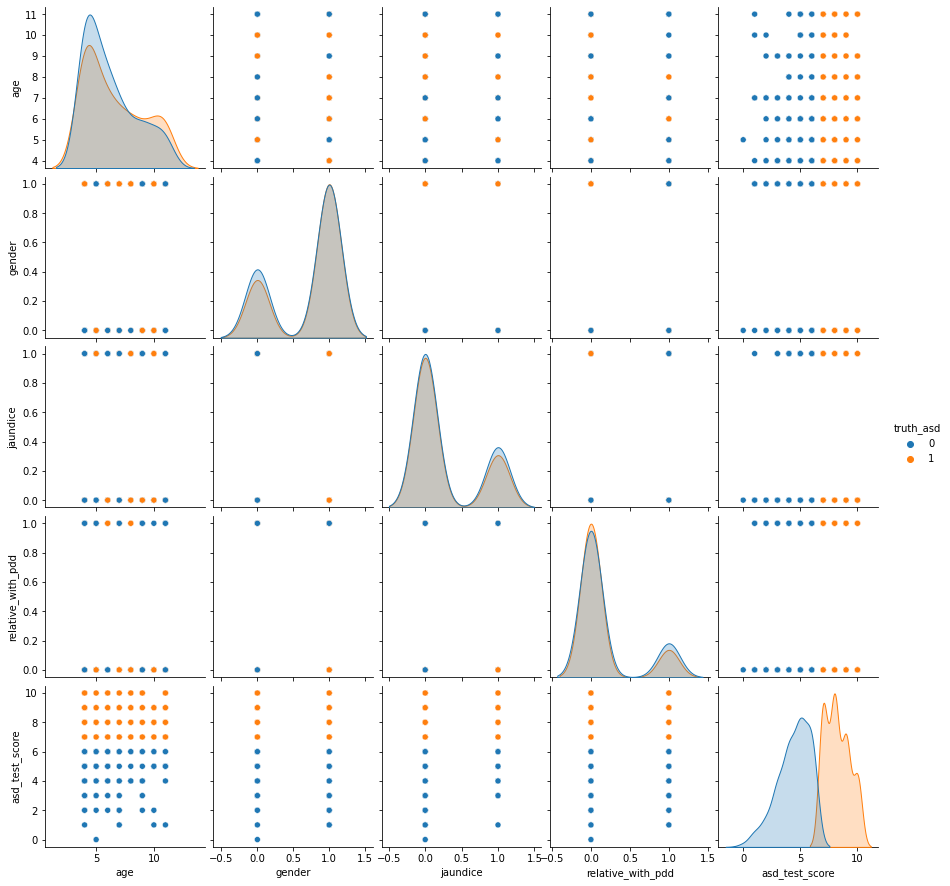

In [162]:
import seaborn as sns

p=sns.pairplot(new_data, hue = 'truth_asd')

In [163]:
import matplotlib.pyplot as plt


In [164]:
#create feature vector X1 with 4 features and label y
X1 = new_data.drop([('truth_asd'),('asd_test_score')],axis = 1).to_numpy()
y = new_data.truth_asd.to_numpy()
print(type(X1),X1.shape)

<class 'numpy.ndarray'> (288, 4)


In [165]:
from sklearn.svm import SVC

In [166]:

#create a test set from 20% data and use remaing for K-fold cross validation with 100 folds 


X1_rem, X1_test, y_rem, y_test = train_test_split(X1,y,test_size=0.2)

from sklearn.model_selection import cross_val_score,cross_validate
svc_2_classifier=SVC(kernel = 'linear')
scores = cross_validate(svc_2_classifier, X1_rem, y_rem, scoring ='f1', cv=100,return_train_score=True)



In [167]:
val_scores = scores.get("test_score")
train_scores  = scores.get("train_score")
print("For SVC Validation scores during cross validation are: "+str(sum(val_scores)/100))
print("For SVC Training scores during cross validation are: "+str(sum(train_scores)/100))


For SVC Validation scores during cross validation are: 0.4129999999999999
For SVC Training scores during cross validation are: 0.5470319862042549


In [168]:
from sklearn.linear_model import LogisticRegression

In [169]:
log_classifier = LogisticRegression()

In [170]:
log_scores = cross_validate(log_classifier, X1_rem, y_rem, scoring ='f1', cv=100,return_train_score=True)


In [171]:
val_scores = log_scores.get("test_score")
train_scores  = log_scores.get("train_score")
print("For LogReg Validation scores during cross validation are: "+str(sum(val_scores)/100))
print("For LogReg Training scores during cross validation are: "+str(sum(train_scores)/100))


For LogReg Validation scores during cross validation are: 0.4383333333333333
For LogReg Training scores during cross validation are: 0.5689010330056967


In [172]:
log_classifier.fit(X1_rem,y_rem)
y_test_pred=log_classifier.predict(X1_test)
f_score = f1_score(y_test,y_test_pred)


In [173]:
print("For Test, F1-score is: "+str(f_score))

For Test, F1-score is: 0.4067796610169491


In [174]:
#create feature vector X2 with 5 features and label y
X2 = new_data.drop([('truth_asd')],axis = 1).to_numpy()
y = new_data.truth_asd.to_numpy()

In [175]:
X2_rem, X2_test, y_rem, y_test = train_test_split(X2,y,test_size=0.2)

from sklearn.model_selection import cross_val_score,cross_validate
svc_2_classifier=SVC(kernel = 'linear')
scores = cross_validate(svc_2_classifier, X2_rem, y_rem, scoring ='f1', cv=100,return_train_score=True)



In [176]:
val_scores = scores.get("test_score")
train_scores  = scores.get("train_score")
print("For SVC Validation scores during cross validation are: "+str(sum(val_scores)/100))
print("For SVC Training scores during cross validation are: "+str(sum(train_scores)/100))


For SVC Validation scores during cross validation are: 1.0
For SVC Training scores during cross validation are: 1.0


In [177]:
log_classifier = LogisticRegression()
log_scores = cross_validate(log_classifier, X2_rem, y_rem, scoring ='f1', cv=100,return_train_score=True)
val_scores = log_scores.get("test_score")
train_scores  = log_scores.get("train_score")
print("For LogReg Validation scores during cross validation are: "+str(sum(val_scores)/100))
print("For LogReg Training scores during cross validation are: "+str(sum(train_scores)/100))


For LogReg Validation scores during cross validation are: 1.0
For LogReg Training scores during cross validation are: 1.0


In [179]:
log_classifier.fit(X2_rem,y_rem)
y_test_pred=log_classifier.predict(X2_test)
f_score = f1_score(y_test,y_test_pred)
print("For Test, F1-score is: "+str(f_score))

For Test, F1-score is: 1.0
